In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from keras import regularizers

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

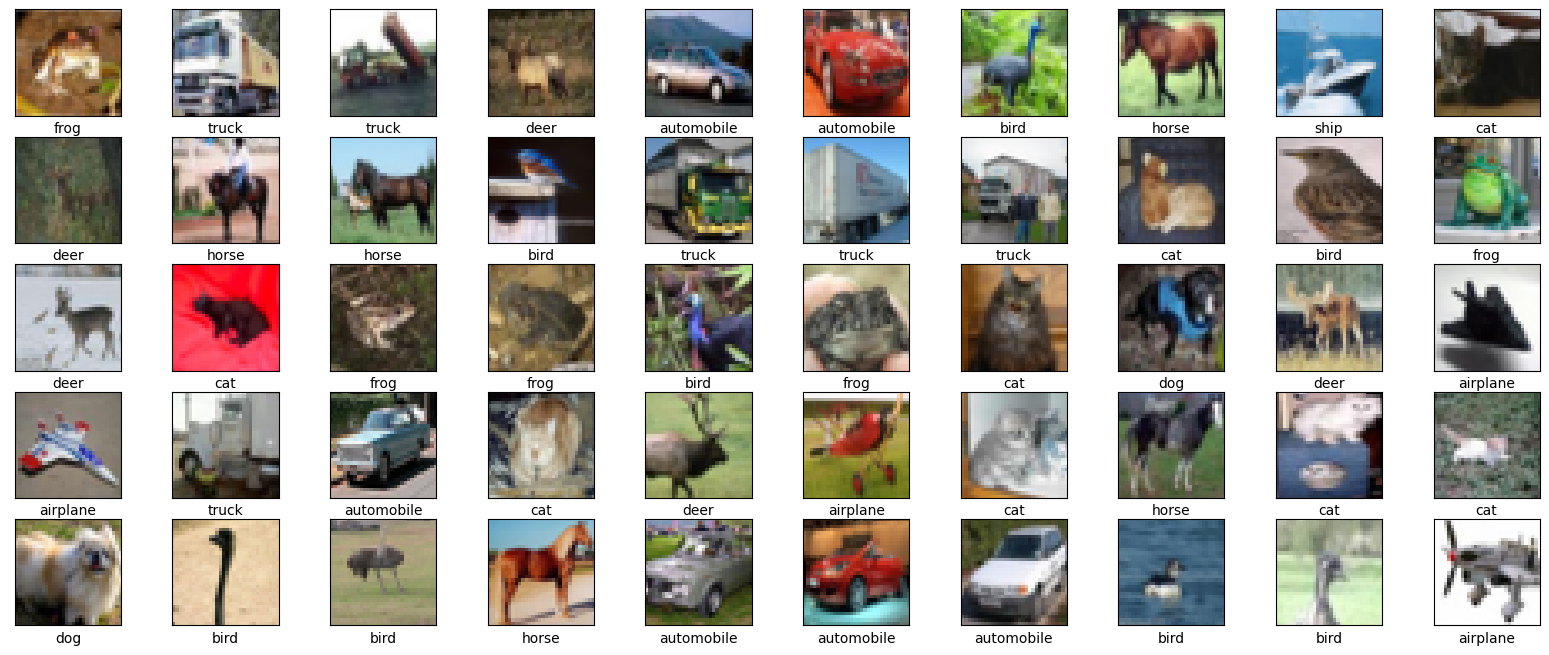

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])
    
plt.show()

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
```
#regularizer = regularizers.l1_l2(l1=0.01, l2=0.01)
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),
    
    ## hidden layers
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), 
#                         kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),  
    #keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
#                         kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    keras.layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    #keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
#                         kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    keras.layers.BatchNormalization(),
    #layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'), 
#                         kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    keras.layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', 
                        kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(96, activation='relu', 
                        kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    
    ## output layer
    keras.layers.Dense(10, activation='softmax')
])
model.summary()
```

```
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 batch_normalization_2 (Batc  (None, 4, 4, 128)        512       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 256)         295168    
                                                                 
 batch_normalization_3 (Batc  (None, 2, 2, 256)        1024      
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 256)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 1, 1, 256)         0         
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 96)                12384     
                                                                 
 batch_normalization_5 (Batc  (None, 96)               384       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 96)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                970       
                                                                 
=================================================================
Total params: 567,850
Trainable params: 566,250
Non-trainable params: 1,600
_________________________________________________________________
```

In [6]:
model_adam = keras.models.load_model("model.h5")

In [7]:
adam_lr = 0.0001
beta1 = 0.99

optimizer_adam = keras.optimizers.Adam(learning_rate=adam_lr, beta_1=beta1)

model_adam.compile(
    optimizer= optimizer_adam, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
h = model_adam.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=64)
k=h

Epoch 1/5
625/625 [==============================] - 15s 9ms/step - loss: 2.5980 - accuracy: 0.2781 - val_loss: 1.8932 - val_accuracy: 0.4124
Epoch 2/5
625/625 [==============================] - 5s 8ms/step - loss: 2.0732 - accuracy: 0.3888 - val_loss: 1.6796 - val_accuracy: 0.4951
Epoch 3/5
625/625 [==============================] - 5s 8ms/step - loss: 1.8288 - accuracy: 0.4561 - val_loss: 1.5284 - val_accuracy: 0.5507
Epoch 4/5
625/625 [==============================] - 5s 8ms/step - loss: 1.6683 - accuracy: 0.5087 - val_loss: 1.4210 - val_accuracy: 0.5890
Epoch 5/5
625/625 [==============================] - 5s 8ms/step - loss: 1.5344 - accuracy: 0.5545 - val_loss: 1.3549 - val_accuracy: 0.6130


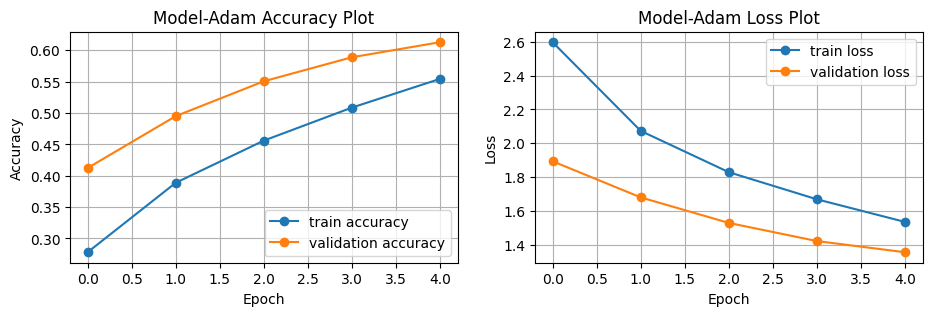

In [9]:
plt.figure(figsize=(35,3))
plt.subplot(1,6,1)
plt.title("Model-Adam Accuracy Plot")
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,2)
plt.title("Model-Adam Loss Plot")
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [10]:
model_sgd = keras.models.load_model("model.h5")

In [11]:
# Tuning Hyper-parameters for SGD
epoch = 10
sgd_lr = 0.001
sgd_dcy = sgd_lr/epoch
optimizer_sgd = keras.optimizers.SGD(learning_rate=sgd_lr, momentum=0.99, nesterov=True, decay=1e-7)

model_sgd.compile(
    optimizer= optimizer_sgd, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [12]:
h = model_sgd.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=64)

Epoch 1/5
625/625 [==============================] - 7s 9ms/step - loss: 2.1555 - accuracy: 0.3251 - val_loss: 1.8067 - val_accuracy: 0.4175
Epoch 2/5
625/625 [==============================] - 5s 8ms/step - loss: 1.7199 - accuracy: 0.4495 - val_loss: 1.5624 - val_accuracy: 0.5083
Epoch 3/5
625/625 [==============================] - 5s 8ms/step - loss: 1.5043 - accuracy: 0.5213 - val_loss: 1.3510 - val_accuracy: 0.5758
Epoch 4/5
625/625 [==============================] - 5s 9ms/step - loss: 1.3346 - accuracy: 0.5741 - val_loss: 1.4258 - val_accuracy: 0.5404
Epoch 5/5
625/625 [==============================] - 5s 8ms/step - loss: 1.2102 - accuracy: 0.6162 - val_loss: 1.1888 - val_accuracy: 0.6247


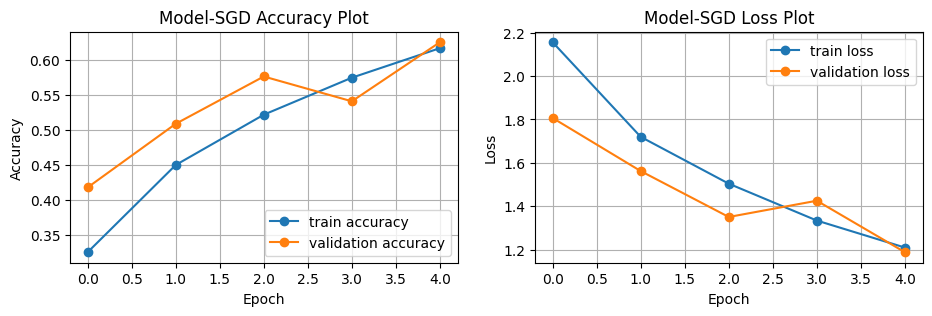

In [13]:
plt.figure(figsize=(35,3))
plt.subplot(1,6,1)
plt.title("Model-SGD Accuracy Plot")
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,2)
plt.title("Model-SGD Loss Plot")
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [14]:
model_rmsprop = keras.models.load_model("model.h5")

In [15]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.0001,
    decay_steps=10000,
    decay_rate=0.9)
epoch = 10
rmsp_lr = lr_schedule
optimizer_rmsp = keras.optimizers.RMSprop(learning_rate = rmsp_lr)

model_rmsprop.compile(
    optimizer= optimizer_rmsp, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [16]:
h = model_rmsprop.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=64)
k2=h

Epoch 1/5
625/625 [==============================] - 8s 11ms/step - loss: 2.5527 - accuracy: 0.2901 - val_loss: 1.8754 - val_accuracy: 0.4212
Epoch 2/5
625/625 [==============================] - 6s 10ms/step - loss: 2.0031 - accuracy: 0.4183 - val_loss: 1.6730 - val_accuracy: 0.4998
Epoch 3/5
625/625 [==============================] - 6s 10ms/step - loss: 1.7478 - accuracy: 0.4913 - val_loss: 1.5176 - val_accuracy: 0.5588
Epoch 4/5
625/625 [==============================] - 6s 10ms/step - loss: 1.5786 - accuracy: 0.5458 - val_loss: 1.3773 - val_accuracy: 0.6081
Epoch 5/5
625/625 [==============================] - 6s 10ms/step - loss: 1.4361 - accuracy: 0.5892 - val_loss: 1.3340 - val_accuracy: 0.6274


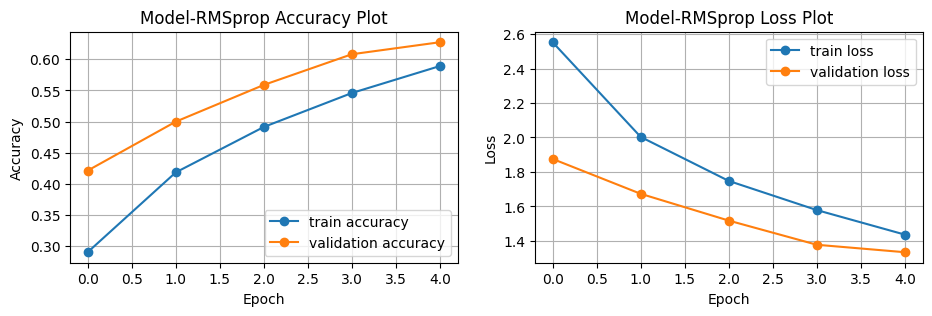

In [17]:
plt.figure(figsize=(35,3))
plt.subplot(1,6,1)
plt.title("Model-RMSprop Accuracy Plot")
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,2)
plt.title("Model-RMSprop Loss Plot")
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [20]:
test_loss_sgd, test_acc_sgd = model_sgd.evaluate(X_test, Y_test)
print("\nMODEL TEST ACCURACY WITH SGD")
print('\nTest Accuracy:', test_acc_sgd)
print('Test Loss:', test_loss_sgd)

313/313 [==============================] - 1s 3ms/step - loss: 1.1912 - accuracy: 0.6218

MODEL TEST ACCURACY WITH SGD

Test Accuracy: 0.6218000054359436
Test Loss: 1.1911758184432983


In [21]:
test_loss_adam, test_acc_adam = model_adam.evaluate(X_test, Y_test)
print("\nMODEL TEST ACCURACY WITH ADAM")
print('\nTest Accuracy:', test_acc_adam)
print('Test Loss:', test_loss_adam)

313/313 [==============================] - 1s 4ms/step - loss: 1.3555 - accuracy: 0.6144

MODEL TEST ACCURACY WITH ADAM

Test Accuracy: 0.6144000291824341
Test Loss: 1.3554999828338623


In [22]:
test_loss_rmsprop, test_acc_rmsprop = model_rmsprop.evaluate(X_test, Y_test)
print("\nMODEL TEST ACCURACY WITH RMSprop")
print('\nTest Accuracy:', test_acc_rmsprop)
print('Test Loss:', test_loss_rmsprop)

313/313 [==============================] - 1s 4ms/step - loss: 1.3325 - accuracy: 0.6253

MODEL TEST ACCURACY WITH RMSprop

Test Accuracy: 0.6252999901771545
Test Loss: 1.3324711322784424


# Discussion

Our model architecture was built focusing on maximum accuracy and minimum loss. To keep the model from overfitting was also considered a primary objective.
SGD & RMSprop is performing better. But SGD has minimun loss (1.19) rather than RMSprop(1.33). Then adam has the maximum loss (1.35) and got maximum accuracy in SGD (62.18). <br>
We used only used L2 regularization to reduce overfitting. L1 was not giving any better results so we didn't use it.Using both L1 and L2 was not giving the best accuracies and sometimes it was underfitting the model. So we only used L2 regularizer in our models.